# Introduction/Business Problem

I propose that the streets of downtown Seattle Washington could do with a checkup on their safety protocols when it comes to traffic safety. In order to understand where we want to go in answering this question, we need to see where we have come from. I propose that by examining different angles of traffic safety information available from public record, we can better understand the challenges we need to face. As we gain a better understanding, we will be able to propose solutions to reduce injuries and fatalities, increase safety and raise the quality of everyone's commuting experience in downtown Seattle. As one simple way to gain understanding of how to increase safety, I intend to see how accident severity correlates to vehicle collision type. Even with this simple understanding, we can see if certain collision types are more damaging than others to body and property. (We can then, in the future, see how vehicle type and location type correlates with these findings.) Obviously, we can gain understanding by looking at other correlations, but this will be the focus of this project.

# Data

For this project, I will be using a publicly available dataset for Seattle, WA traffic collisions. (The link to the dataset is here: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv.) I also consuted a metadata key (https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf) that explained each column. I will be using a combination of data visualization tools to see if we can understand the relationship between the "Severity Code" and "CollisionType" columns. I hope to be able to recommend a couple or so collision types that tend to result in more severe injuries or even fatalities. This will be used to recommend areas of consideration for the most critical safety improvements to Seattle's city council.

# Methodology

In discovering the different possible collison types and how thety relate to different injury types, I loaded the dataset into a dataframe in a Jupyter notebook. I then took a cursory look at all of the columns of data that were available to use. In doing so, I saw that there were just under 195K rows in the dataset. While a few options were available for collision information, I limited my search to the "SEVERITYCODE" and "COLLISIONTYPE" columns for simplicity.

I filtered the dataset to limit to these two columns. I then eliminated rows that contained either "None" or "Other" values, as they were either not useful or too miscellanious to tell me anything useful. I saw that my datasets were now cleaned to reflect nine collison types with only property damage and bodily injury involved. The cleaned dataset still had a healthy 166K rows to work with. I then edited the numerical values of the severity codes to text to more easily identify the damage type in my data visualizations.

For data visualization, I took a couple appproaches. The first thing I did was to do a weighted average for the nine collison type categories to see whether they were predominantly property- or injury-related. The second thing I did was to use bar graphs and histograms to model the data. The first graph compares the relative amounts of bodily injuries and property damage observations aginst each other. The second graph shows the amounts of collsions there were for each type, in descending order. The third and final graph brought both together to see at a glance how many of both damage types there are in each collision category. This was designed to show at a glance what the amounts of each collsion and severity type so the best categories can be given to the Seattle City Council as recommendations for safety revisions.

As a final note on my procedure, I chose to forgo ant machine learning modeling, as using only two feature to predict something that is plainly obvious is not only unnecessary but also impracticable. In a future expansion of this project, I can consdier more varaiable types and with a more column-varied dataframe to make predictions regarding this and future traffic accident data.

# Results

<AxesSubplot:xlabel='COLLISIONTYPE'>

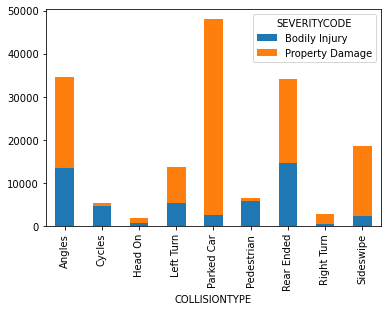

In [21]:
#Combination plot to show both types at once.
data_filter2.groupby(['COLLISIONTYPE', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)

In [12]:
#Generate a weighted average for the dataset to see the relative amounts of property damage vs. injury
grouped = data_filter2.groupby(['COLLISIONTYPE'],as_index=False).mean()
grouped

COLLISIONTYPE  SEVERITYCODE
0        Angles      1.392917
1        Cycles      1.876085
2       Head On      1.430830
3     Left Turn      1.394877
4    Parked Car      1.055473
5    Pedestrian      1.898305
6    Rear Ended      1.430361
7    Right Turn      1.206022
8     Sideswipe      1.134666

In [18]:
#Get basic statistics for revised dataframe
data_filter2.describe()

SEVERITYCODE COLLISIONTYPE
count            166066        166066
unique                2             9
top     Property Damage    Parked Car
freq             115031         47987

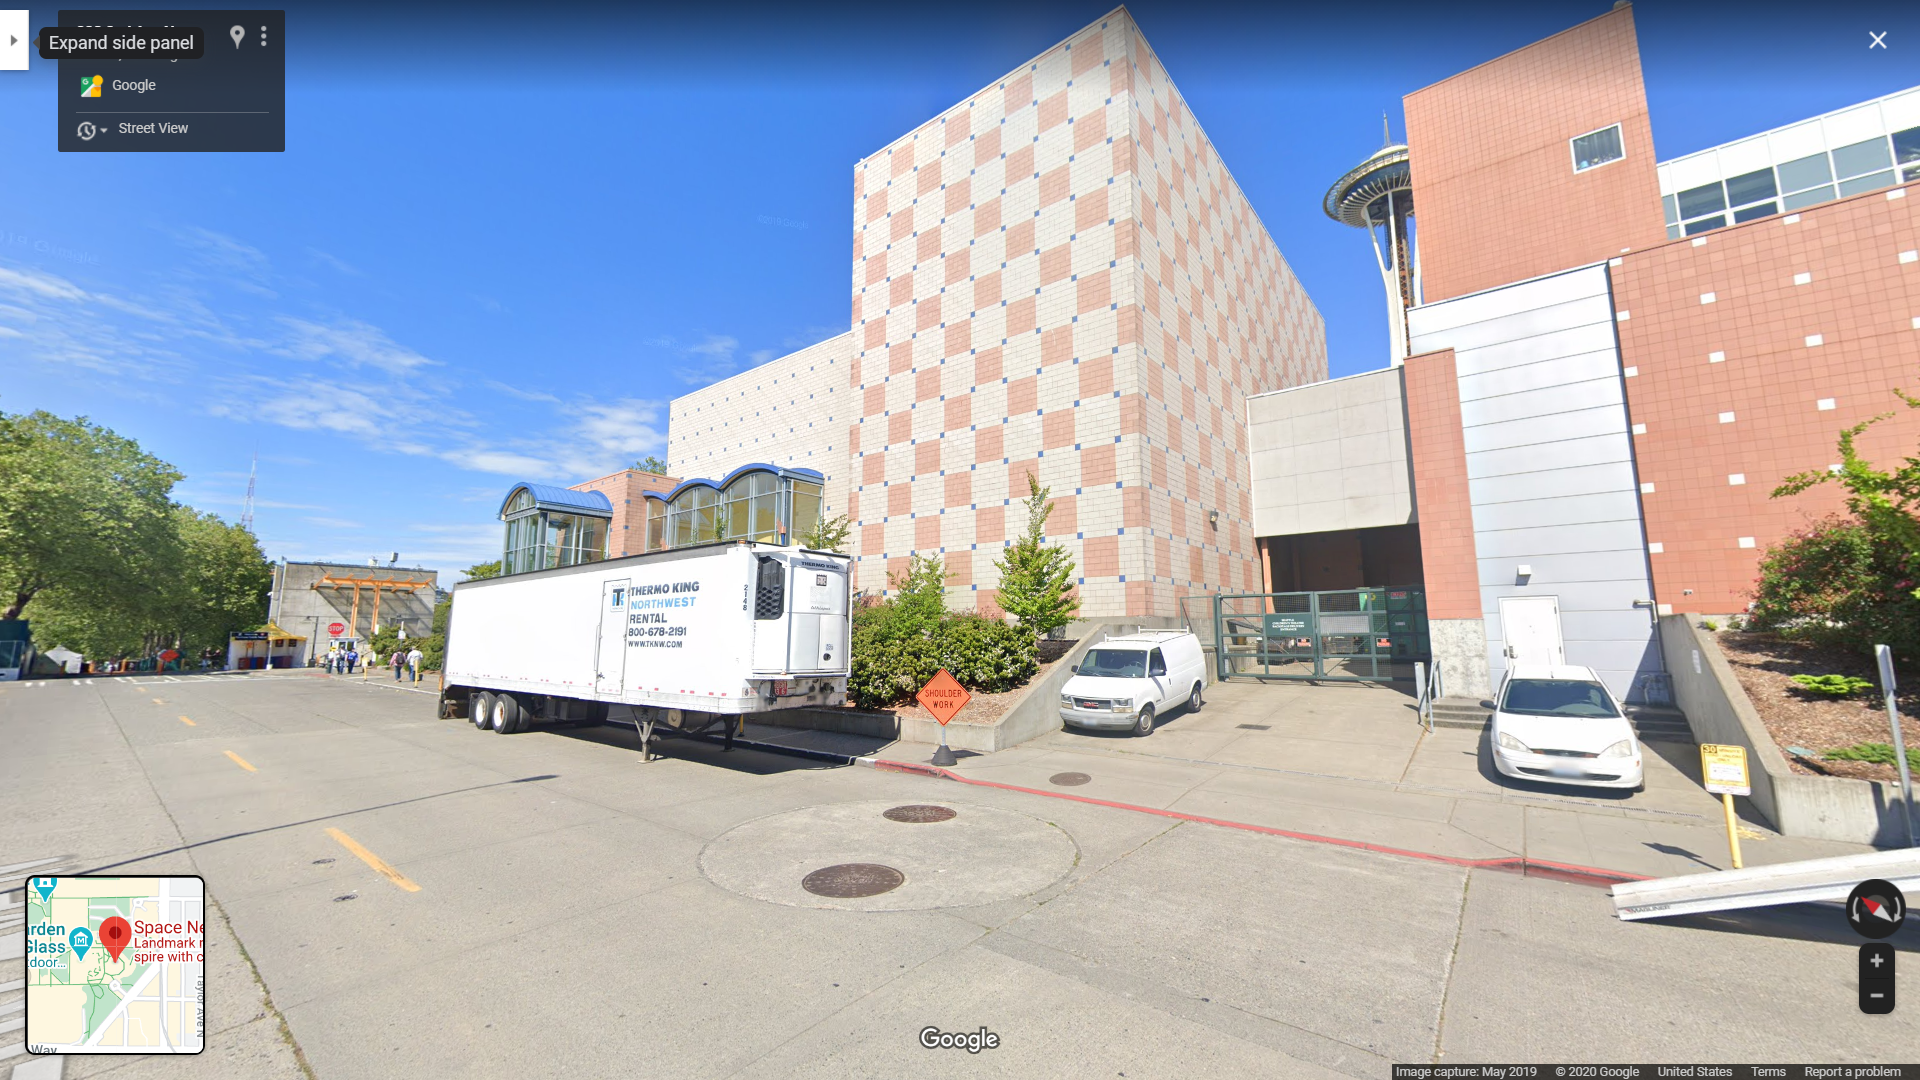

As you can see from the attached bar graph and table, several observations can be made for the collision categories. First, the number of parked car collsions outweigh all other categories and are predominantly property damage-based. This isn't surprising considering parked cars usually don't have people inside them, and many of these accidents probably happen in places like parking lots outside supermarkets. Second, pedestrian and cycle crash types are almost entirely composed of bodily injuries. This also isn't surprising, given that these types have people directly exposed to harm from car crashes. Third, types like sideswipe are mostly proprty damage. This is likely due to the offending car "clipping" the hit vehicle, causing notable damage but not injuring the driver or passengers.

Some types if information that weren't as obvious before I statred this project are that the incidents of head-on collisions are quite low, only around 2000 observations. This is good considering this is usually a serious accident type. Another interesting observation is that while the number of incidents of bodily injury and property damage are about equal in left-turn, angles and rear-ended collision types, right-turm type has nearly triple the property damage compared to injury. Intuitively, it makes sense that at least compared to how left turns are done, the turn radius for right turns is usally shorter and there is more physical car between the driver and the offending vehicle (assuming no passengers), offering more protections. Left turns are also much more common than their right-turn counterparts, again likely due to the greater trun radius.

Looking at the attached Google Maps of downtown Seattle, WA, we can see the roadways are relatively spacious but narrow and that the streets are quite linear without any odd curves. (This is a similar layout to the downtown district of my native Dayton, OH.) This may allow for good ahead visiblity forward and backward, but may obstruct visiblity around corners unless a driver is right up next to an intersection. If there are stop lights every city block, rear-end accidents are likely at red lights in heavy traffic if assured clear distance is not given by drivers behind the leader at red lights. Every other accident type seems liely when traffic is moving and carelessness, congestion or operator error are more to blame.

# Discussion

Admittedly, looking at whether bodily injury or property damage is more prevelant of a severity type is irrelevant to us emotionally, as any accident is bad and stressful. Either type of damage results in straffic delays and causes similar inconveniecnes for emergency responders. Nevertheless, since we can make the case emotionally that property is replacableb but peoples' lives are not, we want to keep injuries down as much as possible especially. So for this project, I will recommend three categories for bodily injury and two categories for property damage to Seattle's City Council for consideration as opportunities for improvement. For the former, angles, left-turn and rear-end collision types. For the latter, parked-car and sideswipe collisons. (Angles, left-turns and rear-end collisions do have a substantive amount of property damage incidents, as well, however, if the solutions to the bodily injuries are successful, they will obviously work for the property damage, too.)

Angles (including side impacts) and rear-end collisons should receive most of the attention, since they both happened nearly 35,000 times in the time span of the dataset. Stronger enforcement of assured clear distance and obeying stop lights via law enforcement could be one way to alleviate these incidents, barring any City Infrastructure changes. Training drivers to be wary during left turns would need similar controls, especially during rush hour traffic.

Sideswipe accidents could occur in different contexts. For drivers who want to "get around" another driver near intersections, for example, close quarters with other drivers who are pulling to a stop are more likely to clip other cars. Again, more enforcement may be one way to go. Another context sideswipes can occur is at street parking. This is where parked-car accidents may also be sideswipe accidents. In this instance, more enforcement may be useful, but it would also be worthj looking at the infrastructure for street parking spots. Looking at the orientation of parking spots and widening them or otherwise moving them away from traffic may by itself reduce the opportunity for sideswipe/parked-car accidents.

Obviously, many other recommendations could be made for other categories, but these would be a good start to (hopefully greatly) begin to reduce the number of accidents in downtown Seattle, WA.

# Conclusion

In general, it seems the dataset and Google map suggest that intersections and street parking are the key areas to consider for acciednt reduction in Seattle, WA. Seattle City Council would do well to evaluate the safety of its street parking infrastructure. When overhauled as needed, this alone would help reduce their relevantaccidents. Enforcing stricter penalties and evaluating other more dynamic meaures for the other types of accidents may help, as well. Who knows, maybe adding a few more signs, rearranging other safety markers or improving driver education may be enough to do the job.

In evaluating this dataset, we see that much could be gleaned from it, but even this simple exercise gives suggestions that experts in traffic safety and civil engineering can utilize to improve the safety for the denizens of Seattle, WA. Many of these suggestions are basic common sense, but they help give focus to the areas that have the greatest need for evaluation. In a future iteration of this analysis, I would like to see how other variables influence "severity type" as a dependent variable. It may then be possible to make predictions from the dataset as to what types of accidents, locations, etc. may be the most critical areas to consider for evaluation.